# **1. `Annotated` (typing.Annotated)**

## **Definition**

`Annotated` is a type hint that allows you to attach **extra metadata** to a type **without changing the type itself**.

It is defined as:

```python
from typing import Annotated
```

---

## **Purpose**

Python normally lets you specify a type:

```python
age: int
```

But sometimes you want to add **metadata** such as:

* description
* validation information
* constraints
* UI hints
* framework-specific metadata

Without affecting the underlying type.

`Annotated` provides a generic way to attach such metadata.

---

## **Example**

```python
from typing import Annotated

Age = Annotated[int, "Age of the user"]
```

Here:

* The type is still `int`
* `"Age of the user"` is just metadata
* Tools like FastAPI, Pydantic, custom validators, linters, or frameworks can read that metadata

---

## **Why It Exists**

Before `Annotated`, frameworks like Pydantic, FastAPI, and Marshmallow used their own custom solutions (e.g., `Field(...)`).

Python introduced `Annotated` to provide:

* a **standard**,
* **library-agnostic**,
* **typing-friendly**
  way to attach metadata to types.

---

## **Real Use Cases**

### **FastAPI**

```python
from typing import Annotated
from fastapi import Path

user_id: Annotated[int, Path(description="ID of the user")]
```

### **Custom validation**

```python
Username = Annotated[str, "must be lowercase"]
```

---

## **Summary**

* Adds metadata *without changing the type*.
* Underlying type stays the same.
* Useful for frameworks that want extra information.
* Similar in spirit to `Field`, but general and part of the typing system.

---

# **2. `TypedDict` (typing.TypedDict)**

## **Definition**

`TypedDict` lets you declare dictionary-like objects where:

* Keys are predefined
* Each key has a specific type
* Missing or extra keys can be checked by type checkers

Example:

```python
from typing import TypedDict
```

---

## **Purpose**

A normal Python dictionary is unrestricted:

```python
person = {"name": "John", "age": 30}
person["age"] = "thirty"  # allowed (but wrong)
person["unknown"] = True  # allowed
```

There is **no type safety**.

`TypedDict` solves this by allowing you to define a *dictionary schema*.

---

## **Example**

```python
class Person(TypedDict):
    name: str
    age: int
```

Now:

* `"name"` must be present and must be `str`
* `"age"` must be present and must be `int`

Example usage:

```python
p: Person = {"name": "John", "age": 30}    # valid
p["age"] = "thirty"                        # type error
p["extra"] = True                          # type error
```

---

## **Optional Keys**

TypedDict supports optional keys:

```python
class Person(TypedDict, total=False):
    name: str
    age: int
```

Now all keys are optional, but type checking still applies.

---

## **Why It Exists**

To bring structure and type checking to dictionaries **without creating classes or dataclasses**.

Used heavily in:

* JSON-like structures
* API responses
* Dictionaries passed between functions
* Config objects

It provides static guarantees without runtime overhead.

---

# **Final Summary**

### **Annotated**

* Adds metadata to a type
* Does not change the actual type
* Useful for validation, documentation, constraints
* Framework-friendly (FastAPI, Pydantic)

### **TypedDict**

* Defines dictionaries with required keys and specific value types
* Adds structure to unstructured dicts
* Helps type checkers prevent key/type errors
* Good for JSON, configs, API schemas

---


# Notes: `operator` Module (Python)

## 1. Overview

* `operator` is a built-in Python module that provides **function equivalents of Python’s operators**.
* Useful in **functional programming**, **LangGraph**, and **agentic systems** for creating clean, declarative state transformations.
* Replaces lambda functions with faster, readable, and serialisable operator functions.

---

## 2. Why Use `operator`?

1. **Performance**
   Operator functions are implemented in C and are faster than equivalent lambda expressions.

2. **Clarity**
   `operator.add(a, b)` clearly expresses an addition operation.

3. **Serialisation-friendly**
   Lambdas cannot be serialised; operator functions can, which is important for agent graphs.

4. **Declarative state updates**
   Common in LangGraph when writing reducers or selectors.

---

## 3. Key Categories of Functions

### 3.1 Arithmetic Operators

Equivalent to `+`, `-`, `*`, `/`, etc.

* `operator.add(a, b)`
* `operator.sub(a, b)`
* `operator.mul(a, b)`
* `operator.truediv(a, b)`

Use case: State increments, counter updates.

---

### 3.2 Comparison Operators

Equivalent to `==`, `<`, `>`, etc.

* `operator.eq(a, b)`
* `operator.ne(a, b)`
* `operator.lt(a, b)`
* `operator.gt(a, b)`

Use case: Decision logic in agent systems.

---

### 3.3 Logical / Bitwise Operators

* `operator.and_(a, b)`
* `operator.or_(a, b)`
* `operator.not_(a)`

Use case: Combining Boolean states or flags.

---

### 3.4 Sequence and Mapping Operators

* `operator.getitem(obj, key)` – same as `obj[key]`
* `operator.setitem(obj, key, value)` – same as `obj[key] = value`
* `operator.delitem(obj, key)`

Use case:
Accessing values from graph state (`itemgetter` used heavily).

---

### 3.5 Function Constructors (Most used in LangGraph)

#### `operator.itemgetter(*items)`

* Creates a function that retrieves items by key/index.
* Example:

  ```python
  get_name = operator.itemgetter("name")
  get_name({"name": "Alex"})
  ```

Use case: Pulling specific fields from the agent state.

#### `operator.attrgetter(*attrs)`

* Fetches object attributes.
* Example:

  ```python
  get_age = operator.attrgetter("age")
  get_age(user)
  ```

#### `operator.methodcaller(name, *args, **kwargs)`

* Calls a method dynamically.
* Example:

  ```python
  call_run = operator.methodcaller("run")
  call_run(agent)
  ```

Use case: Useful in dynamic agent pipelines.

---

## 4. Typical Use in LangGraph / Agent Systems

### 4.1 State Updates (Reducers)

```python
from operator import add

def update_count(state):
    state["count"] = add(state["count"], 1)
    return state
```

### 4.2 Extracting State Fields

```python
from operator import itemgetter

get_query = itemgetter("query")
```

### 4.3 Cleaner Node Functions

Instead of:

```python
lambda x: x["value"]
```

Use:

```python
operator.itemgetter("value")
```

This ensures readability and serialisability.

---

## 5. When to Prefer `operator` Over Lambda

Use `operator` when:

* You want **cleaner**, **faster**, and **pure** functions.
* The function needs to be **serialisable** (e.g., in agent graphs).
* The operation is simple and matches a Python operator.

---


In [6]:
# standards imports
from typing import TypedDict, Annotated, Optional
import operator
import os

# third-party imports
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
GEMINI_API_KEY = "API_KEY_HERE"

In [8]:
# generator, evaluator, and optimizer model

generator_llm = ChatGoogleGenerativeAI(model="gemini-3-pro-preview", api_key=GEMINI_API_KEY)
evaluator_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", api_key=GEMINI_API_KEY)
optimizer_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash", api_key=GEMINI_API_KEY)

E0000 00:00:1765430372.792312 2372973 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765430372.794743 2372973 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765430372.796389 2372973 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [9]:
# output format
class TweeTEvaluation(BaseModel):
    """"
    Represents the evaluation of a tweet.
    """
    evaluation: Literal["approved", "needs_improvement"] = Field(..., description="The evaluation of the content, either 'approved' or 'needs_improvement'.")
    feedback: str = Field(..., description="Feedback on the content") 

In [11]:
# state 

class ContentState(TypedDict, total=False):
    topic: str
    audience: Optional[str]
    content: Optional[str]
    evaluation: Optional[TweeTEvaluation]
    iteration: int
    max_iteration: int
    
    # history of content generations
    history: Annotated[list[str], operator.add]
    feedback_history: Annotated[list[str], operator.add]

In [12]:
from typing import Optional, TypedDict, Annotated, List
from pydantic import BaseModel, Field
from typing import Literal
import operator

# -----------------------------------
# OUTPUT MODEL
# -----------------------------------

class TweeTEvaluation(BaseModel):
    """
    Represents the evaluation of a tweet.
    """
    evaluation: Literal["approved", "needs_improvement"] = Field(
        ..., description="The evaluation of the content, either 'approved' or 'needs_improvement'."
    )
    feedback: str = Field(..., description="Feedback on the content")

# -----------------------------------
# STATE
# -----------------------------------

class ContentState(TypedDict, total=False):
    topic: str
    audience: Optional[str]
    content: Optional[str]
    evaluation: Optional[TweeTEvaluation]
    iteration: int
    max_iteration: int
    # history
    history: Annotated[List[str], operator.add]
    feedback_history: Annotated[List[str], operator.add]

# -----------------------------------
# GENERATE SOCIAL MEDIA POST
# -----------------------------------

def generate_social_media_post(state: ContentState) -> ContentState:

    prompt = [
        SystemMessage(content="You are a creative social media content generator."),
        HumanMessage(content=f"Create a social media post about '{state['topic']}'"
                             f"{' for ' + state['audience'] if state.get('audience') else ''}.\n"
                             "1. Do not use question-answer format\n"
                             "2. Max 280 characters\n"
                             "3. Use Observation-Action-Result format\n"
                             "4. Use meme logic, punchlines, relatable humour\n"
                             "5. Use simple language and avoid jargon\n"
                             "6. Use day-to-day examples")
    ]

    response = generator_llm.invoke(prompt).content

    return {
        **state,
        'content': response,
        'history': state.get('history', []) + [response]
    }

# -----------------------------------
# EVALUATE SOCIAL MEDIA POST
# -----------------------------------

def evaluate_social_media_post(state: ContentState) -> ContentState:

    prompt = [
        SystemMessage(content="You are a social media content evaluator."),
        HumanMessage(content=f"""
Evaluate the following content:

{state['content']}

Provide feedback and rate based on:

1. Originality  
2. Humor  
3. Punchiness  
4. Virality potential  
5. 280-char compliance, no Q&A, no setup-punchline jokes

Auto-reject if:
- Question-answer format  
- >280 characters  
- Setup–punchline joke  
- Ends with generic/deflating lines  

Respond ONLY as:
evaluation: "approved" or "needs_improvement"
feedback: One paragraph
""")
    ]

    response = evaluator_llm.with_structured_output(TweeTEvaluation).invoke(prompt)

    return {
        **state,
        'evaluation': response,
        'feedback_history': state.get('feedback_history', []) + [response.feedback]
    }

# -----------------------------------
# OPTIMISE SOCIAL MEDIA POST
# -----------------------------------

def optimize_social_media_post(state: ContentState) -> ContentState:

    last_feedback = state['feedback_history'][-1]

    prompt = [
        SystemMessage(content="You are a social media content optimizer."),
        HumanMessage(content=f"""
Optimize the following post based on the feedback:

Content:
{state['content']}

Feedback:
{last_feedback}
""")
    ]

    response = optimizer_llm.invoke(prompt).content

    return {
        **state,
        'content': response,
        'iteration': state.get('iteration', 0) + 1,
        'history': state.get('history', []) + [response]
    }

# -----------------------------------
# GENERATE TWEET (EXTRA)
# -----------------------------------

class TweetState(TypedDict, total=False):
    topic: str
    tweet: Optional[str]
    tweet_history: List[str]

def generate_tweet(state: TweetState):

    messages = [
        SystemMessage(content="You are a funny and clever Twitter/X influencer."),
        HumanMessage(content=f"""
Write a short, original, hilarious tweet on the topic: "{state['topic']}".

Rules:
- No question–answer format
- <280 chars
- Observational humor, sarcasm, irony
- Meme logic, punchlines
- Simple day-to-day English
""")
    ]

    response = generator_llm.invoke(messages).content

    return {
        **state,
        'tweet': response,
        'tweet_history': state.get('tweet_history', []) + [response]
    }

# -----------------------------------
# ROUTE EVALUATION
# -----------------------------------

def route_evaluation(state: ContentState):
    if state['evaluation'].evaluation == "approved" or state['iteration'] >= state['max_iteration']:
        return "approved"
    return "needs_improvement"


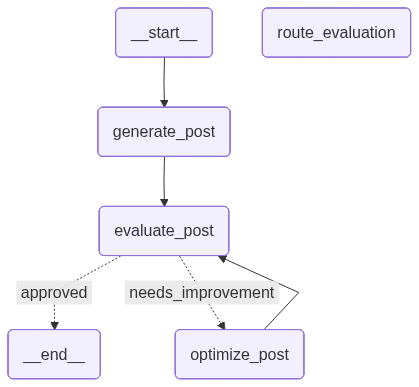

In [17]:
graph = StateGraph(ContentState)

graph.add_node("generate_post", generate_social_media_post)
graph.add_node("evaluate_post", evaluate_social_media_post)
graph.add_node("optimize_post", optimize_social_media_post)
graph.add_node("route_evaluation", route_evaluation)

graph.add_edge(START, "generate_post")
graph.add_edge("generate_post", "evaluate_post")
graph.add_conditional_edges('evaluate_post', route_evaluation, {"approved": END, "needs_improvement": "optimize_post"})
graph.add_edge("optimize_post", "evaluate_post")

workflow = graph.compile()

workflow

In [18]:
# test run
intital_state: ContentState = {
    "topic": "The importance of mental health awareness",  
    "audience": "young adults"
}

In [20]:
results = workflow.invoke(intital_state)

In [21]:
results

{'topic': 'The importance of mental health awareness',
 'audience': 'young adults',
 'content': [{'type': 'text',
   'text': "Noticed I panic when my phone hits 1% but let my own mental battery die daily. Finally swapped the doomscrolling for a nap and a real talk with a friend. Now my brain doesn't sound like dial-up internet anymore. Charge yourself like you charge your iPhone. 🔋🧠✨",
   'extras': {'signature': 'Etc1CtQ1AXLI2ny7MsiodB3ne7w9uGjH6s9YZvY0mPnQqurgfnQTKNvxvQAUhGSkeubdgxJob6xc1WNU0s3VZfKF5CTipuQMdpmYUV/B16NCZ0uOfTkrT4TV01sG76DONss2x73JcAi4dohNsqq4kE6hEdT0uU7YekndyA9LkcLOLVjp1YIhZ3GlCSTrBNjyV0OuTOxEARmoC/90MtB4Dt8zp9T2pkCXkJ5RUgYKY5fOm0NdCWzzCqAfMZTJ3cBc8fgE7HnNAGMrXPwextCFOcFjhOroiXe03CieTTt++SbAvQptQUhPY8yV+EPJQlAj1awfsoRMhxtWdZjG3gOxjbmu2kr71O0DX7iD0D8zA9qYlrFOEAe6965WdyS8TVfaeFUZ40rdXXyHWxi364mejSW3B7kZfTXqSFnjXzsfGTbrfeEblxDq3rFNSg2/lB8AIVO54i9UjymJ1bKggYfc1gS685l0n4m9TE1AkEI9I1SWX+0ry+/+O+HNECjTwnQLqXYl8lUY+ulH8Eg0lsz7jtGWVTZVjGZO6VB0Y5mZQaS2JBkjsItuRh3jrg6gIx84DK3ixix